In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/nfl-arrests/notes.csv
/kaggle/input/nfl-arrests/arrests.csv


## Questions to Answer From Washignton Post
Which stadiums had the most arrests? The least?
Are arrests more likely when the home team lost a game? 
Does the score correlate with number of arrests? (For example, if the game ended in a narrow loss for the home team, does this correlate with more arrests?)
Are there any stadiums with consistent arrest rates, regardless of how the game ended?

### Some Additional Questions I Have
On certain days (Thursday vs Sunday vs Monday)
Did the arrest rates change year to year?


To start the analysis, I'm going to import the data, I'll import both the arrests and notes.

In [26]:
arrestsTotal = pd.read_csv('../input/nfl-arrests/arrests.csv')
notes = pd.read_csv('../input/nfl-arrests/notes.csv')

**I'll start by doing basic data analysis to learn more about the dataset. I like to see the first 5 rows, then I'll look at the last five rows, to see what the data looks like.

In [27]:
arrestsTotal.head()

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,NaN,5.0,n
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,NaN,6.0,n
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,NaN,9.0,n
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,OT,6.0,y
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,OT,3.0,n


In [28]:
arrestsTotal.tail()

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
1001,2015,7,Sunday,1:00:00 PM,Washington,Tampa Bay,31,30,NaN,2.0,n
1002,2015,10,Sunday,1:00:00 PM,Washington,New Orleans,47,14,NaN,2.0,n
1003,2015,12,Sunday,1:00:00 PM,Washington,New York Giants,20,14,NaN,2.0,y
1004,2015,13,Monday,8:30:00 PM,Washington,Dallas,16,19,NaN,4.0,y
1005,2015,15,Sunday,1:00:00 PM,Washington,Buffalo,35,25,NaN,1.0,n


**Finally I'll get a random sample of 10 rows

In [29]:
arrestsTotal.sample(10)

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
988,2013,14,Sunday,1:00:00 PM,Washington,Kansas City,10,45,NaN,0.0,n
497,2015,16,Sunday,12:00:00 PM,Kansas City,Cleveland,17,13,NaN,0.0,n
664,2012,14,Thursday,5:20:00 PM,Oakland,Denver,13,26,NaN,24.0,y
701,2012,15,Thursday,8:20:00 PM,Philadelphia,Cincinnati,13,34,NaN,1.0,n
167,2014,2,Sunday,1:00:00 PM,Cincinnati,Atlanta,24,10,NaN,4.0,n
435,2012,10,Thursday,8:20:00 PM,Jacksonville,Indianapolis,10,27,NaN,0.0,y
41,2011,4,Sunday,8:20:00 PM,Baltimore,New York Jets,34,17,NaN,0.0,n
437,2012,14,Sunday,1:00:00 PM,Jacksonville,New York Jets,10,17,NaN,1.0,n
554,2014,3,Sunday,1:00:00 PM,New England,Oakland,16,9,NaN,7.0,n
953,2014,8,Sunday,12:00:00 PM,Tennessee,Houston,16,30,NaN,0.0,y


**Get the data shape**

In [30]:
arrestsTotal.shape

(1006, 11)

**I'll take a look at the Notes dataset.

In [31]:
notes.head()

,home_team,2011,2012,2013,2014,2015,notes
0,Arizona,8,8,8,8,8,NaN
1,Atlanta,0,0,0,0,0,"provided only in-stadium arrest data, was not ..."
2,Baltimore,8,0,7,8,8,"2012 data had errors, was not included; played..."
3,Buffalo,0,0,0,0,0,"only provided 2014 and 2015 data to The Post, ..."
4,Carolina,8,8,8,8,8,NaN


**After looking at the notes dataset, it's just extra information about the original dataset so I will disregard it unless I have a question. One thing to note is that some of the teams did not provide as much data (Ex: Baltimore, Buffalo)**

**Now I will run describe on the dataset, which will return basic statistics about the data. 
From this list, I see the mean number of arrests is 6.56, but the highest is 69 arrests! I'm wondering about that!
Looking at the arrests column, the mean is 6, but the standard deviation is 9, and the range of arrests go from 0 to 69. 50% of the number of arrests are 3 or lower, and 75% are 8 or lower. So there is obviously at least one major outlier.**

In [32]:
arrestsTotal.describe()

,season,week_num,home_score,away_score,arrests
count,1006.000000,1006.000000,1006.000000,1006.000000,966.000000
mean,2013.000000,9.116302,23.934394,21.115308,6.566253
std,1.406453,5.008986,10.442626,9.734006,9.512101
min,2011.000000,1.000000,0.000000,0.000000,0.000000
25%,2012.000000,5.000000,17.000000,14.000000,1.000000
50%,2013.000000,9.000000,23.000000,20.000000,3.000000
75%,2014.000000,14.000000,30.000000,27.000000,8.000000
max,2015.000000,17.000000,59.000000,56.000000,69.000000


**So I would like to get started by looking at a histogram of some columns, starting with week number.**
**There are some dips with fewer arrests during the middle of the season versus the most at the end and at the start of the season.**

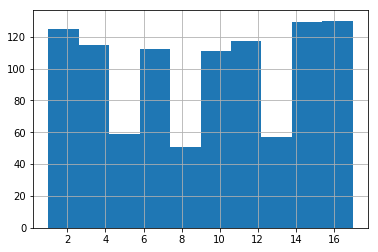

In [33]:
week = arrestsTotal['week_num']
week.hist()

**Finally I'll look at arrests histogram to see what that data looks like.**

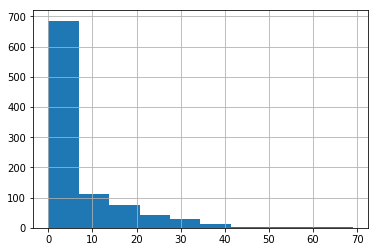

In [34]:
arrestNo=arrestsTotal['arrests']
arrestNo.hist()

**So from the above histogram, it's clear that 0 arrests is the most common value, but I do see there is a long tail, almost reaching 70! I'd like to quickly get a count of arrests over 8, which represents the top 25% of the data values for arrests (the describe section above), so 227 rows are returned.**

In [35]:
arrestsTotal[arrestsTotal['arrests'].gt(8)]

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,NaN,9.0,n
9,2012,3,Sunday,1:05:00 PM,Arizona,Philadelphia,27,6,NaN,12.0,n
33,2015,3,Sunday,1:05:00 PM,Arizona,San Francisco,47,7,NaN,10.0,y
172,2014,10,Thursday,8:25:00 PM,Cincinnati,Cleveland,3,24,NaN,10.0,y
193,2012,8,Sunday,3:25:00 PM,Dallas,New York Giants,24,29,NaN,15.0,y
...,...,...,...,...,...,...,...,...,...,...,...
843,2015,9,Sunday,1:05:00 PM,San Francisco,Atlanta,17,16,NaN,22.0,n
844,2015,12,Sunday,1:05:00 PM,San Francisco,Arizona,13,19,NaN,12.0,y
845,2015,15,Sunday,1:25:00 PM,San Francisco,Cincinnati,14,24,NaN,9.0,n
846,2015,17,Sunday,1:25:00 PM,San Francisco,St. Louis,19,16,OT,18.0,y


**I want to see the highest end of the arrests to see what that tells me, so I selected 50 and above. When Pittsburgh is the home team there were 52 and 56 arrests. There are two instances where the highest number of arrests, 69, occured. Both times were when Oakland played at San Diego!**


In [36]:
arrestsTotal[arrestsTotal['arrests'].gt(50)]

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
739,2012,11,Sunday,8:20:00 PM,Pittsburgh,Baltimore,10,13,NaN,52.0,y
744,2013,3,Sunday,8:30:00 PM,Pittsburgh,Chicago,23,40,NaN,56.0,n
771,2011,10,Thursday,5:20:00 PM,San Diego,Oakland,17,24,NaN,69.0,y
782,2012,17,Sunday,1:25:00 PM,San Diego,Oakland,24,21,NaN,60.0,y


**While it's intersting to see the pattern with the highest number of arrests, that's only 4 data points. So now I want to see how the data looks for cases where the number of arrests are greater than 30.**

In [37]:
over30 = arrestsTotal[arrestsTotal['arrests'].gt(30)]
arrestsTotal[arrestsTotal['arrests'].gt(30)]

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
575,2011,13,Sunday,4:15:00 PM,New York Giants,Green Bay,35,38,NaN,35.0,n
576,2011,15,Sunday,1:00:00 PM,New York Giants,Washington,10,23,NaN,31.0,y
578,2012,1,Wednesday,8:20:00 PM,New York Giants,Dallas,17,24,NaN,39.0,y
591,2013,12,Sunday,4:25:00 PM,New York Giants,Dallas,21,24,NaN,46.0,y
599,2014,12,Sunday,8:30:00 PM,New York Giants,Dallas,28,31,NaN,33.0,y
605,2015,7,Sunday,4:25:00 PM,New York Giants,Dallas,27,20,NaN,35.0,y
607,2015,13,Sunday,1:00:00 PM,New York Giants,New York Jets,20,23,OT,39.0,n
608,2015,15,Sunday,1:00:00 PM,New York Giants,Carolina,35,38,NaN,31.0,n
610,2011,1,Sunday,8:20:00 PM,New York Jets,Dallas,27,24,NaN,34.0,n
617,2011,16,Saturday,1:00:00 PM,New York Jets,New York Giants,14,29,NaN,31.0,n


**I see a lot of entries for New York and San Diego, so next I'll examine the stadiums that have over 30 arrests in more detail.**

In [38]:
over30.groupby([ 'home_team', 'arrests']).count()

season  week_num  day_of_week  gametime_local  \
home_team       arrests                                                  
New York Giants 31.0          2         2            2               2   
                33.0          1         1            1               1   
                35.0          2         2            2               2   
                39.0          2         2            2               2   
                46.0          1         1            1               1   
New York Jets   31.0          1         1            1               1   
                32.0          1         1            1               1   
                34.0          1         1            1               1   
                38.0          1         1            1               1   
                44.0          1         1            1               1   
Oakland         49.0          1         1            1               1   
Pittsburgh      31.0          1         1            1               1   
                34.0          1         1            1               1   
                37.0          1         1            1               1   
                52.0          1         1            1               1   
                56.0          1         1            1               1   
San Diego       31.0          1         1            1               1   
                36.0          2         2            2               2   
                37.0          1         1            1               1   
                40.0          2         2            2               2   
                41.0          1         1            1               1   
                45.0          1         1            1               1   
                47.0          1         1            1               1   
                60.0          1         1            1               1   
                69.0          1         1            1               1   
San Francisco   33.0          1         1            1               1   
                35.0          1         1            1               1   

                         away_team  home_score  away_score  OT_flag  \
home_team       arrests                                               
New York Giants 31.0             2           2           2        0   
                33.0             1           1           1        0   
                35.0             2           2           2        0   
                39.0             2           2           2        1   
                46.0             1           1           1        0   
New York Jets   31.0             1           1           1        0   
                32.0             1           1           1        1   
                34.0             1           1           1        0   
                38.0             1           1           1        0   
                44.0             1           1           1        0   
Oakland         49.0             1           1           1        0   
Pittsburgh      31.0             1           1           1        0   
                34.0             1           1           1        0   
                37.0             1           1           1        0   
                52.0             1           1           1        0   
                56.0             1           1           1        0   
San Diego       31.0             1           1           1        1   
                36.0             2           2           2        0   
                37.0             1           1           1        0   
                40.0             2           2           2        0   
                41.0             1           1           1        1   
                45.0             1           1           1        0   
                47.0             1           1           1        0   
                60.0             1           1           1        0   
                69.0            

**Now I'll start with the first question: Which stadiums had the most arrests? The least?
To solve this I'll look the data for the home team.
And again, given the data, the team with the most arrests is San Diego. However, if you count the stadium, the Jets and Giants play at the same stadium, so Giants Stadium has the most arrests. Detroit has the least - with zero arrests.**

In [39]:
homeStadiumArrests = arrestsTotal.groupby(['home_team']).agg({'arrests': 'sum'}).sort_values(by='arrests', ascending=False)
print(homeStadiumArrests)

                 arrests
home_team               
San Diego          983.0
New York Giants    899.0
New York Jets      858.0
Pittsburgh         670.0
Oakland            658.0
San Francisco      454.0
Green Bay          288.0
New England        188.0
Dallas             169.0
Arizona            166.0
Philadelphia       126.0
Washington         107.0
Denver             105.0
Indianapolis        91.0
Tennessee           83.0
Miami               74.0
Kansas City         71.0
Jacksonville        64.0
Cincinnati          57.0
Carolina            55.0
Baltimore           46.0
Houston             40.0
Tampa Bay           33.0
Seattle             32.0
Chicago             26.0
Detroit              0.0


**The next question is are arrests more likely when the home team lost a game? To analyze this, I've made a new column to arrestsCopy that holds the result of home score - away score, so if the number is negative, then the home team lost.**

In [40]:
arrestsCopy = arrestsTotal
arrestsCopy['resultScore']=arrestsCopy.apply(lambda row: row.home_score - 
                                  (row.away_score), axis = 1) 


**Now breakout the games where the home team lost and where the home team won**
**And finally where there are ties**

In [41]:
homeStadiumLose = arrestsCopy[arrestsCopy['resultScore'].lt(0)]
homeStatiumWin = arrestsCopy[arrestsCopy['resultScore'].gt(0)]
homeStadiumTie = arrestsCopy[arrestsCopy['resultScore'].eq(0)]

**Now to find the total arrests for each category**

In [49]:
loss = homeStadiumLose.groupby(['home_team']).agg({'arrests': 'sum'}).sort_values(by='arrests', ascending=False)

win = homeStatiumWin.groupby(['home_team']).agg({'arrests': 'sum'}).sort_values(by='arrests', ascending=False)
tie = homeStadiumTie.groupby(['home_team']).agg({'arrests': 'sum'}).sort_values(by='arrests', ascending=False)

**Let's try printing the top 10 of each**

In [43]:
print(loss[:10])
print(win[:10])
print(tie[:10])

                 arrests
home_team               
New York Giants    518.0
San Diego          481.0
Oakland            425.0
New York Jets      422.0
Pittsburgh         256.0
San Francisco      181.0
Dallas              84.0
Philadelphia        65.0
Green Bay           60.0
Washington          57.0
                 arrests
home_team               
San Diego          502.0
New York Jets      436.0
Pittsburgh         414.0
New York Giants    381.0
San Francisco      265.0
Oakland            233.0
Green Bay          220.0
New England        165.0
Arizona            111.0
Denver              92.0
               arrests
home_team             
Green Bay          8.0
San Francisco      8.0
Tennessee          7.0
Cincinnati         1.0


**Just looking at the results, it doesn't seem overwhelmingly evident, so let's make a visualization, but ignoring
ties since there are only 4 ties**
**It seems some stadiums will have slightly more arrests if they lose (San Diego, Giants Stadium, Pittsburgh) whereas 
other stadiums will have more arrests (in some cases many more arrests) if they win (Green Bay, New England, Arizona and Denver)**
**San Francisco looks the closest for wins or losses (but still has about 70 more arrests when there are wins).

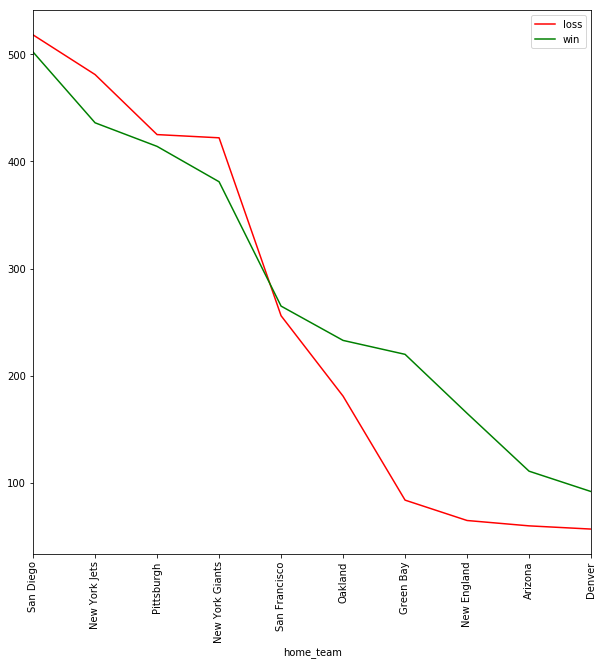

In [44]:
ax = loss.sort_values(by='arrests', ascending=0)[:10].plot(kind='line', figsize=(10, 10), color='red', stacked=False, rot=90)
win.sort_values(by='arrests', ascending=0)[:10].plot(ax=ax, kind='line', color='green', stacked=False, rot=90)

ax.legend(["loss", "win"])

**Next I will look at close games versus larger deficits, so close will be 6 or less points, not close will be 24 or more points, 
This is arbitrary but I'll just start there.**

In [45]:
close =  arrestsCopy[arrestsCopy['resultScore'].between(-6, 6, inclusive=True)]
notClose = arrestsCopy[arrestsCopy['resultScore'].le(-24) | arrestsCopy['resultScore'].gt(24)]
                                                                        
closeGraph = close.groupby(['home_team']).agg({'arrests': 'sum'}).sort_values(by='arrests', ascending=False)
notCloseGraph = notClose.groupby(['home_team']).agg({'arrests': 'sum'}).sort_values(by='arrests', ascending=False)


**Now let's graph the results, which are very clear! Close games lead to more arrests when graphing the top 10, especially for the stadiums with the most arrests.**

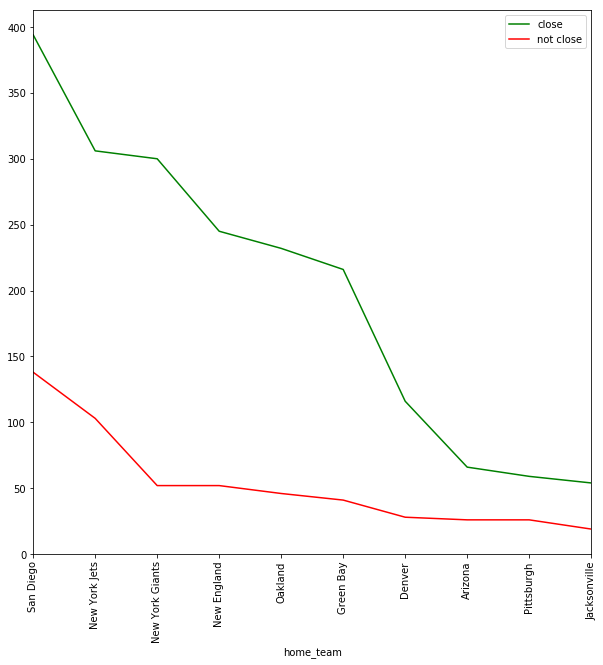

In [46]:
ax = closeGraph.sort_values(by='arrests', ascending=0)[:10].plot(kind='line', figsize=(10, 10), color='green', stacked=False, rot=90)
notCloseGraph.sort_values(by='arrests', ascending=0)[:10].plot(ax=ax, kind='line', color='red', stacked=False, rot=90)

ax.legend(["close", "not close"])

**To determine if day of the week influences arrests, let's compare them, really it's unfair to compare Sunday, since most games are played then, but Monday and Thursday are comparable since there is usually only one game each. Saturday is usually for playoffs and the numbers bear that out.**

In [47]:
monArrests = len([x for x in arrestsTotal['day_of_week'] if 'Monday' in x])
thursArrests = len([x for x in arrestsTotal['day_of_week'] if 'Thursday' in x])
satArrests = len([x for x in arrestsTotal['day_of_week'] if 'Saturday' in x])
sunArrests = len([x for x in arrestsTotal['day_of_week'] if 'Sunday' in x])
print('The number of Monday arrests are: ' + str(monArrests))
print('The number of Thursday arrests are: ' + str(thursArrests))
print('The number of Saturday arrests are: ' + str(satArrests))
print('The number of Sunday arrests are: ' + str(sunArrests))

The number of Monday arrests are: 70
The number of Thursday arrests are: 64
The number of Saturday arrests are: 16
The number of Sunday arrests are: 855


**Now let's look at year over year for all teams to see if there is a trend, which it turns out there are the same number approximately 200.**

In [48]:
yr2011 = arrestsTotal[arrestsTotal.season == 2011].count()
yr2012 = arrestsTotal[arrestsTotal.season == 2012].count()
yr2013 = arrestsTotal[arrestsTotal.season == 2013].count()
yr2014 = arrestsTotal[arrestsTotal.season == 2014].count()
yr2015 = arrestsTotal[arrestsTotal.season == 2015].count()
print(yr2011['season'])
print(yr2012['season'])
print(yr2013['season'])
print(yr2014['season'])
print(yr2015['season'])


199
200
206
204
197


**Summary**
**Most Arrests**
The top five stadiums had the most arrests: San Diego, NY Giants, NY Jets, Pittsburgh, and Oakland. 
**Wins vs Losses**
The top five stadiums for number of arrests when the team won the game: NY Giants, San Diego, Oakland, NY Jets, and Pittsburgh.
The top five stadiums for number of arrests when the team lost the game: Sand Diego, NY Jets, Pittsburgh, NY Giants, and San Francisco.
Close games had more arrests than close games. 
**Most Arrests in a Game**
Two Oakland at San Diego had the highest number of arrests at 69 for each game. 